In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load the Data
df = pd.read_csv('students_data.csv')

### 2Basic Exploration

In [9]:
#columns 
df.columns

Index(['Name', 'Age', 'Gender', 'Grade', 'Math_Score', 'Science_Score',
       'Class'],
      dtype='object')

In [11]:
#Shape
df.shape

(7, 7)

In [35]:
#data types of data
df.dtypes

Name              object
Age              float64
Gender            object
Grade             object
Math_Score       float64
Science_Score    float64
Class             object
dtype: object

#### 3.Plot the data to derive inferences

In [18]:
import seaborn as sns


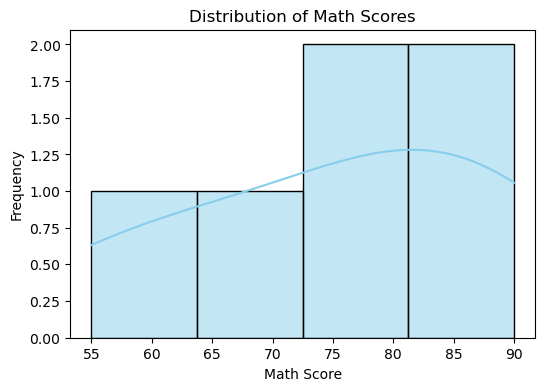

In [22]:
# 1. Histogram of Math Scores

plt.figure(figsize=(6, 4))
sns.histplot(df['Math_Score'], kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()


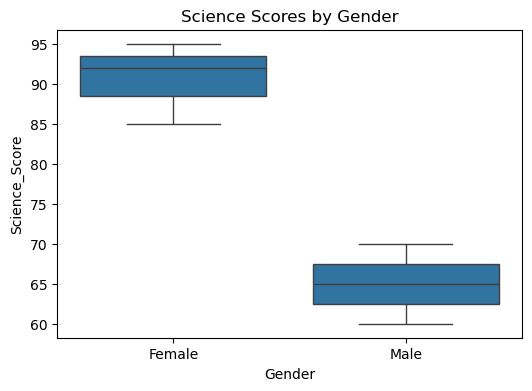

In [24]:
# 2. Boxplot of Science Scores by Gender
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Science_Score', data=df)
plt.title('Science Scores by Gender')
plt.show()


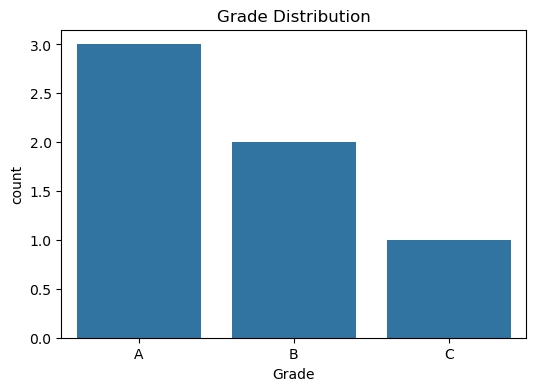

In [26]:
# 3. Count plot of Grades
plt.figure(figsize=(6, 4))
sns.countplot(x='Grade', data=df)
plt.title('Grade Distribution')
plt.show()


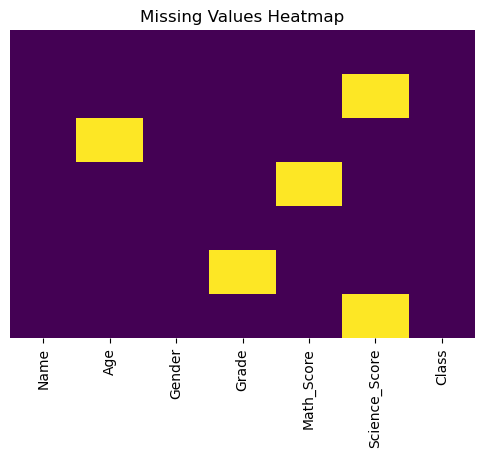

In [28]:
# 4. Missing value heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()


### Q4: Display First Few Records

In [31]:
# Display first 5 records
print(df.head())


     Name   Age  Gender Grade  Math_Score  Science_Score Class
0  Snehal  17.0  Female     A        88.0           92.0   10A
1   Rohan  16.0    Male     B        75.0            NaN   10B
2  Kartik   NaN    Male     C        65.0           70.0   10A
3  Karuna  17.0  Female     A         NaN           95.0   10B
4     Sau  16.0  Female     B        80.0           85.0   10A


### Q5: Display the Summary of the Dataset

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           7 non-null      object 
 1   Age            6 non-null      float64
 2   Gender         7 non-null      object 
 3   Grade          6 non-null      object 
 4   Math_Score     6 non-null      float64
 5   Science_Score  5 non-null      float64
 6   Class          7 non-null      object 
dtypes: float64(3), object(4)
memory usage: 524.0+ bytes


In [41]:
df.describe()

,Age,Math_Score,Science_Score
count,6.000000,6.000000,5.000000
mean,16.833333,75.500000,80.400000
std,0.752773,13.546217,14.943226
min,16.000000,55.000000,60.000000
25%,16.250000,67.500000,70.000000
50%,17.000000,77.500000,85.000000
75%,17.000000,86.000000,92.000000
max,18.000000,90.000000,95.000000


#### Q6: Perform Missing Values Handling and Data Encoding
##### Handling missing values
##### Encoding categorical data



In [44]:
#Step 1: Handling Missing Values
#Fill numeric missing values with mean
#Fill categorical missing values with mode

In [48]:
# Fill numeric missing values with mean
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Math_Score'] = df['Math_Score'].fillna(df['Math_Score'].mean())
df['Science_Score'] = df['Science_Score'].fillna(df['Science_Score'].mean())


In [52]:
df['Grade'].fillna(df['Grade'].mode()[0])

0    A
1    B
2    C
3    A
4    B
5    A
6    A
Name: Grade, dtype: object

In [54]:
#Step 2: Encode Categorical Variables
#Label Encoding for ordinal
#One-Hot Encoding for nominal: Gender, Class

In [56]:
from sklearn.preprocessing import LabelEncoder

In [58]:
# Encode Grade (Ordinal)
grade_order = {'A': 3, 'B': 2, 'C': 1}
df['Grade'] = df['Grade'].map(grade_order)


In [60]:
le_gender = LabelEncoder()
df['Gender'] = le_gender.fit_transform(df['Gender'])  # Female:0, Male:1

In [ ]:
# One-Hot encode Class
df = pd.get_dummies(df, columns=['Class'], drop_first=True)

In [66]:
print(df.columns.tolist())


['Name', 'Age', 'Gender', 'Grade', 'Math_Score', 'Science_Score', 'Class_10B', 'Class_10C']


#### Q7: Normalization and Standardization of Numerical Data

In [69]:
num_cols = ['Age', 'Math_Score', 'Science_Score']


In [71]:
from sklearn.preprocessing import MinMaxScaler


In [73]:
minmax = MinMaxScaler()
normalized_data = df[num_cols].copy()
normalized_data[num_cols] = minmax.fit_transform(df[num_cols])


In [75]:
print("=== Normalized Data ===")
print(normalized_data.head())


=== Normalized Data ===
        Age  Math_Score  Science_Score
0  0.500000    0.942857       0.914286
1  0.000000    0.571429       0.582857
2  0.416667    0.285714       0.285714
3  0.500000    0.585714       1.000000
4  0.000000    0.714286       0.714286


In [77]:
from sklearn.preprocessing import StandardScaler


In [79]:
scaler = StandardScaler()
standardized_data = df[num_cols].copy()
standardized_data[num_cols] = scaler.fit_transform(df[num_cols])


In [81]:
print("=== Standardized Data ===")
print(standardized_data.head())


=== Standardized Data ===
        Age  Math_Score  Science_Score
0  0.261968    1.091832   1.026911e+00
1 -1.309842   -0.043673   1.258041e-15
2  0.000000   -0.917139  -9.206785e-01
3  0.261968    0.000000   1.292491e+00
4 -1.309842    0.393060   4.072232e-01


#### Q8: Correlation Analysis and Heatmap Visualization

In [86]:
#Generate a correlation matrix for numerical features
#Plot it as a heatmap
#Interpret which features are highly correlated

In [88]:
#correlation
corr_matrix = df[['Age', 'Math_Score', 'Science_Score']].corr()
print("=== Correlation Matrix ===")
print(corr_matrix)


=== Correlation Matrix ===
                    Age  Math_Score  Science_Score
Age            1.000000   -0.446200      -0.462499
Math_Score    -0.446200    1.000000       0.765629
Science_Score -0.462499    0.765629       1.000000


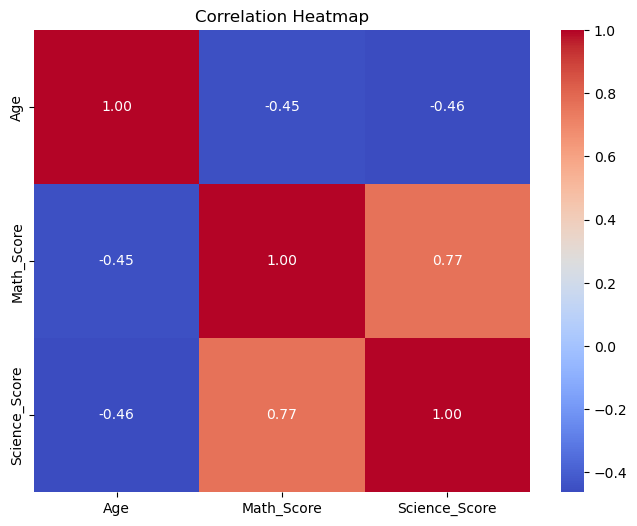

In [94]:
#Visualize using Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Observations:
Math_Score & Science_Score = 0.77
Strong positive correlation
Students who perform well in Math tend to perform well in Science too.

Age & Math_Score = -0.45
 Moderate negative correlation
As age increases, math scores tend to decrease slightly.

Age & Science_Score = -0.46
Moderate negative correlation
Older students might be scoring slightly lower in Science.



### Q9: Summary Report – Data Encoding & Exploration


In [109]:
'''
A.Summary of the Dataset
Shape: (number of rows, columns)
Columns: ['Name', 'Age', 'Gender', 'Grade', 'Math_Score', 'Science_Score', 'Class']
Types: Mixed (Numerical + Categorical)
Initial Insights: Dataset contains academic performance data of students, including demographic and score details.
'''

"\nSummary of the Dataset\nShape: (number of rows, columns)\nColumns: ['Name', 'Age', 'Gender', 'Grade', 'Math_Score', 'Science_Score', 'Class']\nTypes: Mixed (Numerical + Categorical)\nInitial Insights: Dataset contains academic performance data of students, including demographic and score details.\n"

In [112]:
'''
B. How Missing Values Were Handled
Numerical columns (e.g., Math_Score, Science_Score): Filled using mean imputation.
Categorical columns (e.g., Gender, Grade): Filled using mode (most frequent value).
'''

'\nB. How Missing Values Were Handled\nNumerical columns (e.g., Math_Score, Science_Score): Filled using mean imputation.\nCategorical columns (e.g., Gender, Grade): Filled using mode (most frequent value).\n'

In [114]:
'''
C. Encoding Used and Why
Label Encoding: Used for ordinal columns like Grade (e.g., A > B > C).
One-Hot Encoding: Used for nominal categorical columns like Class.
'''

'\nC. Encoding Used and Why\nLabel Encoding: Used for ordinal columns like Grade (e.g., A > B > C).\nOne-Hot Encoding: Used for nominal categorical columns like Class.\n'

In [118]:
''' 
D. Difference: Normalized vs. Standardized Data

| Technique       | Range        | Use Case                                      |
| --------------- | ------------ | --------------------------------------------- |
| Normalization   | 0 to 1       | When feature scale matters (KNN, SVM)         |
| Standardization | Mean=0, SD=1 | When normal distribution is assumed (LR, PCA) |


Normalized data compresses all features to the same scale.
Standardized data centers features around mean and standard deviation.

'''


' \nD. Difference: Normalized vs. Standardized Data\n\n| Technique       | Range        | Use Case                                      |\n| --------------- | ------------ | --------------------------------------------- |\n| Normalization   | 0 to 1       | When feature scale matters (KNN, SVM)         |\n| Standardization | Mean=0, SD=1 | When normal distribution is assumed (LR, PCA) |\n\n\nNormalized data compresses all features to the same scale.\nStandardized data centers features around mean and standard deviation.\n\n'

In [122]:

'''
E. Insights from Correlation Matrix
Math_Score and Science_Score → Strong positive correlation (0.77)

Age and scores → Moderate negative correlation (-0.45 to -0.46)

Older students tend to have slightly lower scores.

Correlation matrix helps in feature selection and multicollinearity detection.
'''


'\nE. Insights from Correlation Matrix\nMath_Score and Science_Score → Strong positive correlation (0.77)\n\nAge and scores → Moderate negative correlation (-0.45 to -0.46)\n\nOlder students tend to have slightly lower scores.\n\nCorrelation matrix helps in feature selection and multicollinearity detection.\n'